# The Polynomial Time Complexity Class ($P$)
***

In [174]:
try: import matplotlib.pyplot as plt
except:
    !pip install matplotlib
    import matplotlib.pyplot as plt

try: import numpy as np
except:
    !pip install numpy
    import numpy as np

In [175]:
# https://arxiv.org/pdf/1308.2891.pdf

## 1. Introduction

<!-- Hand written SVG -->
<center>
    <svg height="200px" width="400px">
        <ellipse cx="200" cy="100" rx="200" ry="100" style="fill: lightgrey; stroke: black; stroke-width:2" />
        <text x="200" y="100" text-anchor="middle" fill="black" font-size="30">P</text>
        <!-- P problems -->
        <text x="50" y="100" text-anchor="middle" fill="black" font-size="15">Sort Validation</text>
        <text x="200" y="175" text-anchor="middle" fill="black" font-size="15">Palindromes</text>
        <text x="200" y="25" text-anchor="middle" fill="black" font-size="15">Greatest Common Divisor</text>
        <text x="350" y="100" text-anchor="middle" fill="black" font-size="15">Primality</text>
    </svg> 
</center>

In [176]:
# http://www.cs.ecu.edu/karl/6420/spr16/Notes/P/examples.html

$P$ is a class of decision problems that can be solved in deterministic polynomial time on a deterministic Turing machine, this class is sometimes also referred to as $PTIME$. [0]

A computational problem is considered in $P$, if there is an algorithm that can solve it in polynomial time for all possible inputs, there is no restriction on the amount of space it requires.
Worst-case scenarios for time are bound by a polynomial function determined by the input size.
Although it is common for algorithms in $P$ to be implemented to require polynomial space, there is a correlation between time and space complexity, as time is the amount of executed instructions, and space is the amount of memory being used.

For algorithms in $P$ the run-time is known ahead of time, and this polynomial is pre-determined meaning it can't dynamically change based on the input. An example would be bubble sort, implemented with two for loops, with a time complexity of O($n^2$), the exponent is pre-determined and will always be $2$, and will not increase.

There also exists a class called $PSPACE$ which includes algorithms that run in polynomial space but not necessarily in polynomial time.

Decision problems are the set of problems that can be answered with the boolean **yes** or **no** answer.

Now although algorithms such as sorting don't directly return a **yes** or **no** answer, it can be used to verify if an array is sorted and that is a boolean, so when used in verification they can be considered a decision problem.

In [177]:
def is_sorted(arr):
    # Worst case sorting algorithm is O(n^2) bubble sort
    return sorted(arr) == arr # This is O(1)

Deterministic Turing machine, meaning that the Turing machines output is predetermined by its input, will always have the same output for the same input. The alternative being probablism which can be found in quantum computers. I will explore this topic in more detail below.

A polynomial is usually better than a best-case exponential as it approaches $\infty$.
It can appear that a polynomial is initially worse than a best-case exponential, but as the input sizes increase, the polynomial will always be better, as evident in the plot below.

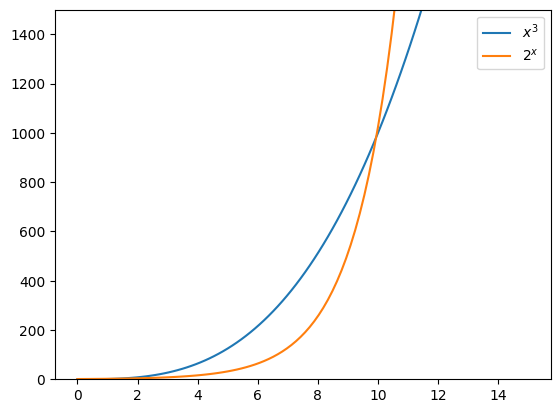

In [178]:
x = np.linspace(0, 15, 100)

plt.plot(x, x ** 3, label='$x^3$')
plt.plot(x, 2 ** x, label='$2^x$')

plt.legend()
plt.ylim([0, 1500]) # Make the overtake obvious
plt.show()

Examples of Big O's that are in $P$:<br>
O($1$), O($n$), O($log$ $n$), O($n$ $log$ $n$), O($n^k$)*

Big O's that are not in $P$ ($NP$):<br>
O($n^2$), O($n^m$), O($n!$)

*$k$ being constant

## 2. Formal Language

$$
A^* =
\bigcup_{i=0}^\infty A^i
$$

https://github.com/ianmcloughlin/structures-and-operations/blob/main/structures-and-operations.pdf

In [179]:
import itertools

print("A: ", A := {0, 1})

def possible_strings(A, k):
    return [*itertools.product(A, repeat=k)]

for i in range(1, 4 + 1):
    str_version = ", ".join([''.join([str(j) for j in i]) for i in possible_strings(A, i)])
    print(f"A^{i}:", str_version)

A:  {0, 1}
A^1: 0, 1
A^2: 00, 01, 10, 11
A^3: 000, 001, 010, 011, 100, 101, 110, 111
A^4: 0000, 0001, 0010, 0011, 0100, 0101, 0110, 0111, 1000, 1001, 1010, 1011, 1100, 1101, 1110, 1111


***
## 3. Polynomials

An example of a polynomial is: $3x^2 + 4x + 2$.

The polymonial is usually ordered by the exponent value of each term. The term that has the highest power is the first term. In the above example, the last two terms are actually $4x^1$ and $2x^0$.

The degree of a polynomial is the highest exponent of the terms. As seen in the example above it is $2$. [1]

### 3.1 Term

<span style="color: red">10</span>
<span style="color: green">x</span>
<span style="color: blue">^9</span>

The properties of a term are:
- The <span style="color: red">constant</span> is the number that is multiplied by the variable.
- The <span style="color: green">variable</span> is the letter part that is multiplied by the constant (this is usually $x$).
- The <span style="color: blue">exponent</span> is the number is used to raise the variable to a power. [1]

***
## 4. Deterministic Turing machine

In [180]:
import collections

B, L, R = None, 'L', 'R'

def turing_machine(tape, initial_state, state_table, state_count=None):
    tape = collections.defaultdict(lambda: B, {k: v for k, v in enumerate(tape)})
    tape[len(tape.keys())] = B
    state, operations_count, head = initial_state, 0, 0

    if state_count is not None:
        state_count[state] += 1

    # Run until we are out of tape.
    while tape[head] != B:
        tape[head], direction, state = state_table[(state, tape[head])]
        operations_count += 1
        head += 1 if direction == R else -1

    return state, operations_count, tape

In [181]:
_0, _1, Y, N = '0', '1', 'Y', 'N'

even_number_state_table = (
    # (state, read, write, move, next_state)
    (Y, _0, _0, R, Y),
    (Y, _1, _1, R, N),
    (Y,  B,  B, R, Y),
    (N, _0, _0, R, Y),
    (N, _1, _1, R, N),
    (N,  B,  B, R, N)
)
# The table above looks nice, but O(1) is better.
even_number_state_table = {state[:2]: state[2:] for state in even_number_state_table}

def is_even(number):
    tape = bin(number)[2:] # Remove the 0b prefix.
    return turing_machine(tape, N, even_number_state_table)[0] == Y

In [182]:
import random

# Test is_even
print("\n".join([*map(lambda num: f"{num} is even: {is_even(num)}",
    [random.randint(0, 1000) for i in range(5)])]))

531 is even: False
453 is even: False
125 is even: False
769 is even: False
990 is even: True


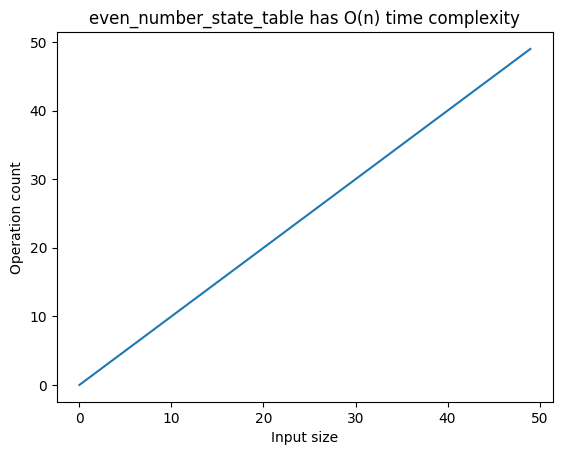

In [183]:
operation_count_list = [] # List of operation counts for each input size.
for i in range(0, 50):
    # Generate a random binary string.
    random_bin_string  = ''.join([str(random.randint(0, 1)) for _ in range(i)])
    operation_count_list += [turing_machine(random_bin_string, N, even_number_state_table)[1]]

plt.plot(operation_count_list)
plt.title("even_number_state_table has O(n) time complexity")
plt.xlabel("Input size")
plt.ylabel("Operation count")
plt.show()

***
## 5. Determining if a problem is in $P$

For this example I will be using a decision problem that checks if one or more $0$'s are left to the middle of a string and the same amount the same amount to the right. This algorithm hasn't been given a name so I will refer to it as `zero_middle_one`.

This string is invalid `0010`, due to there being a 0 after the middle position of the string.
And this one `00011` is also invalid, because there isn't the same amount of $0$'s as $1$'s.

The code below will produce some acceptable strings.

In [184]:
acceptable_inputs = [] # Acceptable inputs.
rejectable_inputs = ["0010", "00011"] # Rejectable inputs.

for i in range(0, 4 + 1):
    acceptable_inputs += [f"{'0' * i}{'1' * i}"]
    print(f"\"{acceptable_inputs[-1]}\"")

""
"01"
"0011"
"000111"
"00001111"


Here is a python implementation of the algorithm:

In [185]:
def zero_middle_one(input_string):
    # Reject strings that are of odd length.
    if len(input_string) % 2 != 0: return False

    # Find the middle position.
    middle_position = len(input_string) // 2

    # Isolate the sides.
    zeros = input_string[middle_position:]
    ones = input_string[:middle_position]

    # Reject if the sides don't contain just 0s and 1s.
    return set(zeros) != {'0'} or set(ones) != {'1'}

In [186]:
accept_tests_pass = all([zero_middle_one(test) for test in acceptable_inputs])
reject_tests_pass = not all([zero_middle_one(test) for test in rejectable_inputs])

print("Accepted all test cases:", accept_tests_pass)
print("Rejected all test cases:", reject_tests_pass)

Accepted all test cases: True
Rejected all test cases: True


Ok so you now should have an understanding what this decision problem accepts and rejects. We are now trying to determine if this problem is in $P$.

***
P vs NP

P: Polynomial time
NP: Non-deterministic polynomial time

P vs NP refers to the age old debate of whether P is equal to NP or not. [2]

***
## 6. Problems in $P$

### 6.1. Sort Validation

The worst-case deterministic time sorting algorithm is O($n^2$) (bubble sort). There of course exists better algorithms such as heap sort, but we are only concerned with the worst-case scenario. Calling this algorithm once and comparing it to the input array will result in a boolean answer, **yes** or **no**. Concluding that sort validation is in $P$.

In [187]:
def bubble_sort(arr):
    arr = arr.copy() # Keep original array untampered.
    # Two nested loops, O(n^2) time complexity.
    for i in range(0, len(arr), -1):
        for j in range(0, i):
            if arr[j] > arr[j + 1]:
                # Bubble up the smaller value.
                arr[j], arr[j + 1] = arr[j + 1], arr[j]

def is_sorted(arr):
    return bubble_sort(arr) == arr # This is O(1)

### 6.2. Greatest Common Divisor

### 6.3. Primality

### 6.4. Palindromes

***
## 7. Problems That Might Be in $P$
There exists problems that don't yet have a proof that they are in $P$.
But are presumed to be so.

https://en.wikipedia.org/wiki/Conway%27s_Game_of_Life

### 7.1. Game of Life
John Conways Game of Life is a cellular automation simulation zero player game (requiring no user input), where cells follow deterministic rules used to determine their next state.

Given an initial state, verify a state is reachable by the specified number of executions.

### 7.2. Graph Isomorphism
Current the graph isomorphism problem is known to be solvable in quasi-polynomial time, quasi meaning its not exactly polynomial.




In [188]:
### 4.3 Integer Factorization

***
## 8. Other Complexity Classes

### 8.1. NP

### 8.2. co-NP

### 8.3. NP-Hard

### 8.4. NP-Complete


In [189]:
# https://www.geeksforgeeks.org/types-of-complexity-classes-p-np-conp-np-hard-and-np-complete/

***
## 9. Conclusion

An open question is computer science is whether P ?= NP.

***
## References
[0] [https://en.wikipedia.org/wiki/P_(complexity)](https://en.wikipedia.org/wiki/P_(complexity))<br>
[1] [https://www.mathsisfun.com/algebra/polynomials.html](https://www.mathsisfun.com/algebra/polynomials.html)<br>
[2] [https://news.mit.edu/2009/explainer-pnp](https://news.mit.edu/2009/explainer-pnp)<br>

https://en.wikipedia.org/wiki/P-complete


https://brilliant.org/wiki/complexity-classes/

https://github.com/ianmcloughlin/structures-and-operations/blob/main/structures-and-operations.pdf